In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import MDS
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import pdist, cdist, squareform
from sklearn.linear_model import Ridge
from scipy.spatial import ConvexHull
from scipy.stats import gaussian_kde
from matplotlib import colormaps
import umap
from matplotlib.colors import LinearSegmentedColormap

# Loading data

In [2]:
path = r"C:\Users\matta\Desktop\Documents\Python\Geolocation\climate_data\working_data\clean_labeled_climate_data_elev.pkl"
df = pd.read_pickle(path)
df.shape

(470320, 126)

In [3]:
df.dropna(inplace = True)
df.reset_index(drop=True, inplace = True)
df.shape

(470320, 126)

In [4]:
df.Level_1.value_counts()

Level_1
8  EASTERN TEMPERATE FORESTS          147066
9  GREAT PLAINS                       137052
10  NORTH AMERICAN DESERTS             84567
6  NORTHWESTERN FORESTED MOUNTAINS     52764
5  NORTHERN FORESTS                    24177
11  MEDITERRANEAN CALIFORNIA            9499
13  TEMPERATE SIERRAS                   6136
7  MARINE WEST COAST FOREST             5596
12  SOUTHERN SEMIARID HIGHLANDS         2362
15  TROPICAL WET FORESTS                1101
Name: count, dtype: int64

In [5]:
df = df[df.Level_1 != '0  WATER'].reset_index(drop=True)
df.shape

(470320, 126)

In [6]:
df.Level_1.unique()

['5  NORTHERN FORESTS', '7  MARINE WEST COAST FOREST', '6  NORTHWESTERN FORESTED MOUNTAINS', '10  NORTH AMERICAN DESERTS', '9  GREAT PLAINS', '8  EASTERN TEMPERATE FORESTS', '11  MEDITERRANEAN CALIFORNIA', '13  TEMPERATE SIERRAS', '12  SOUTHERN SEMIARID HIGHLANDS', '15  TROPICAL WET FORESTS']
Categories (10, object): ['10  NORTH AMERICAN DESERTS', '11  MEDITERRANEAN CALIFORNIA', '12  SOUTHERN SEMIARID HIGHLANDS', '13  TEMPERATE SIERRAS', ..., '6  NORTHWESTERN FORESTED MOUNTAINS', '7  MARINE WEST COAST FOREST', '8  EASTERN TEMPERATE FORESTS', '9  GREAT PLAINS']

In [7]:
df.Level_1.nunique()

10

In [8]:
df.columns[-6:]

Index(['Level_2', 'Level_3', 'Level_4', 'ECO_NAME', 'climates_f', 'elevation'], dtype='object')

In [9]:
features = list(set(list(df.columns)) - set(['longitude', 'latitude', 'Level_1', 'Level_2', 'Level_3', 'Level_4', 'ECO_NAME', 'climates_f']))

In [10]:
feature_df = df[features]
scaler = StandardScaler()
scaled_df = scaler.fit_transform(feature_df)

In [11]:
scaled_df = pd.DataFrame(scaled_df)
scaled_df.columns = features
scaled_df[['longitude', 'latitude', 'Level_1', 'Level_2', 'Level_3', 'Level_4', 'ECO_NAME', 'climates_f']] = df[['longitude', 'latitude', 'Level_1', 'Level_2', 'Level_3', 'Level_4', 'ECO_NAME', 'climates_f']]
scaled_df.shape

(470320, 126)

# Data exploration

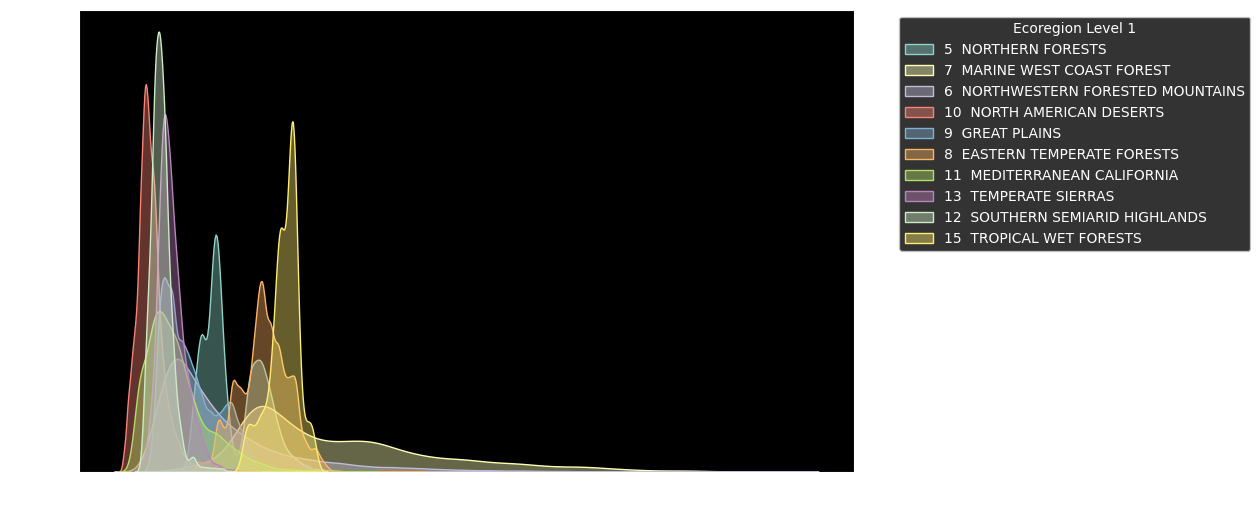

In [12]:
plt.figure(figsize=(10,6))
plt.style.use("dark_background")
for cat in df["Level_1"].unique():
    subset = df[df["Level_1"] == cat]
    sns.kdeplot(
        subset["annual_precip"],
        label=cat, 
        fill=True,
        alpha=0.4
    )

plt.legend(title="Ecoregion Level 1", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

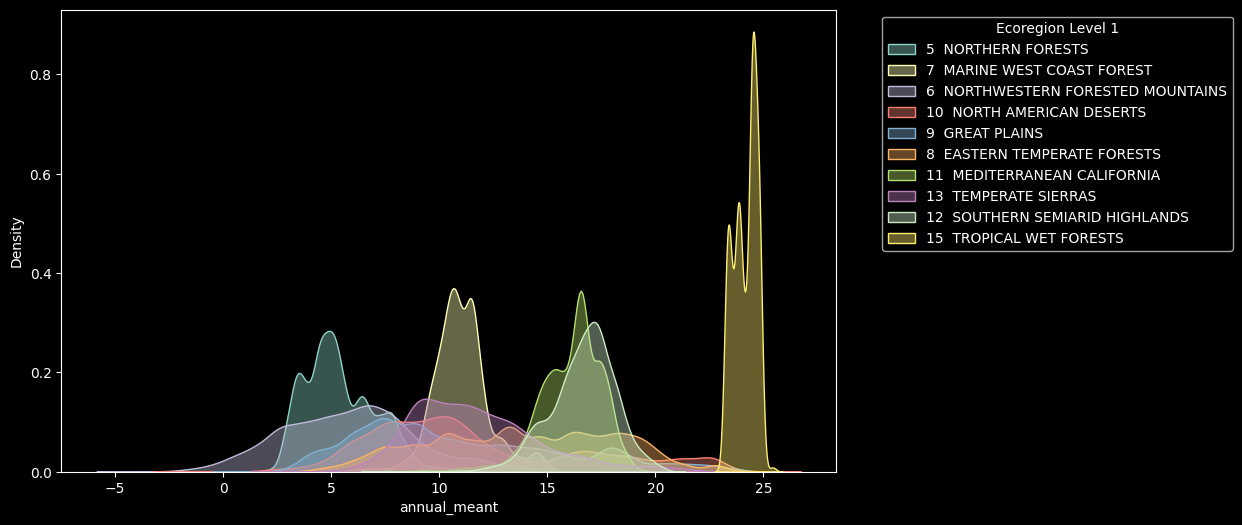

In [13]:
plt.figure(figsize=(10,6))
plt.style.use("dark_background")
for cat in df["Level_1"].unique():
    subset = df[df["Level_1"] == cat]
    sns.kdeplot(
        subset["annual_meant"],
        label=cat, 
        fill=True,
        alpha=0.4
    )

plt.legend(title="Ecoregion Level 1", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

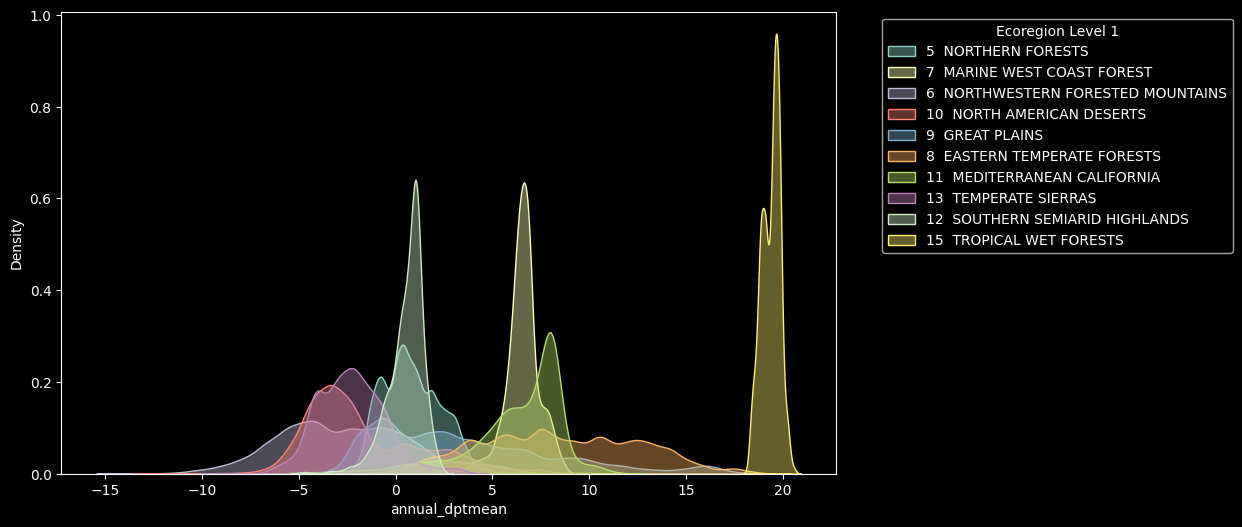

In [14]:
plt.figure(figsize=(10,6))
plt.style.use("dark_background")
for cat in df["Level_1"].unique():
    subset = df[df["Level_1"] == cat]
    sns.kdeplot(
        subset["annual_dptmean"],
        label=cat, 
        fill=True,
        alpha=0.4
    )

plt.legend(title="Ecoregion Level 1", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

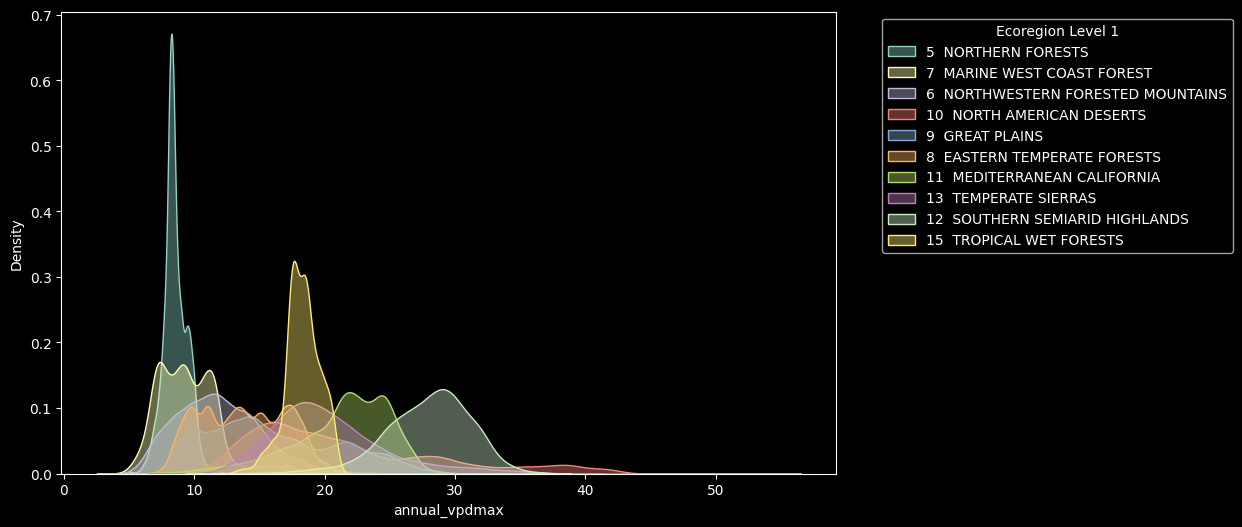

In [15]:
plt.figure(figsize=(10,6))
plt.style.use("dark_background")
for cat in df["Level_1"].unique():
    subset = df[df["Level_1"] == cat]
    sns.kdeplot(
        subset["annual_vpdmax"],
        label=cat, 
        fill=True,
        alpha=0.4
    )

plt.legend(title="Ecoregion Level 1", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

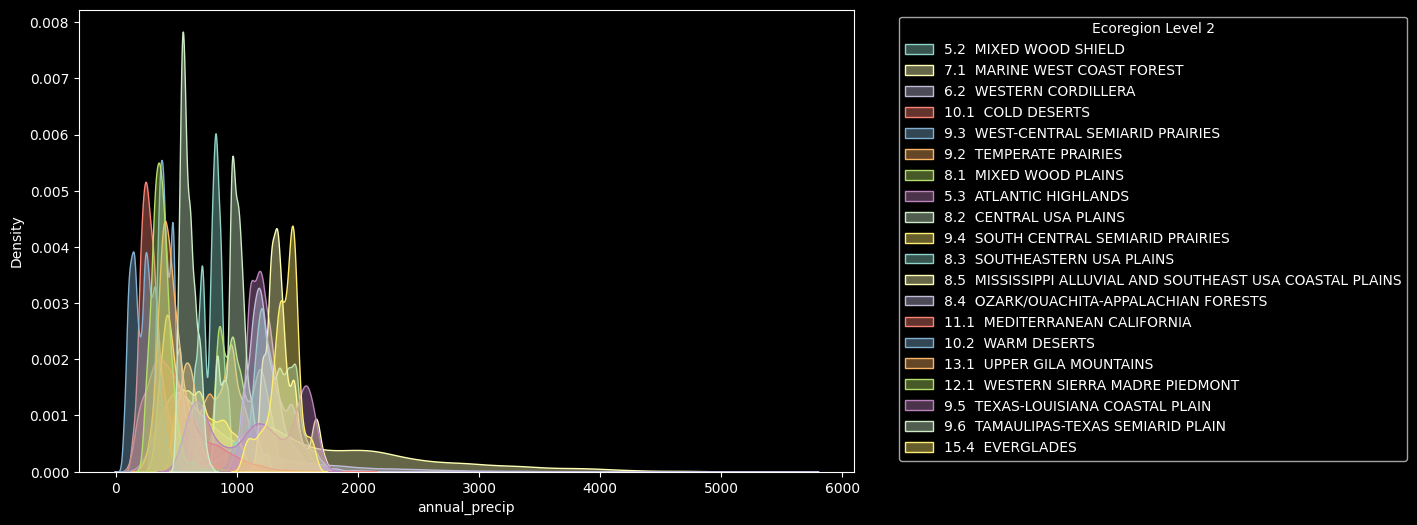

In [16]:
plt.figure(figsize=(10,6))
plt.style.use("dark_background")
for cat in df["Level_2"].unique():
    subset = df[df["Level_2"] == cat]
    sns.kdeplot(
        subset["annual_precip"],
        label=cat, 
        fill=True,
        alpha=0.4
    )

plt.legend(title="Ecoregion Level 2", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

# PCA

In [17]:
pca = PCA(n_components=0.95)   
X_pca = pca.fit_transform(scaled_df[features])
pca_df = pd.DataFrame(X_pca)
print(pca_df.shape)
pca_df.head()

(470320, 6)


0         1         2         3         4         5
0 -12.688948 -0.331300 -4.058187  1.887009 -0.570801 -0.093466
1 -12.756904 -0.301539 -4.052919  1.957064 -0.606899 -0.129293
2 -12.833668 -0.268478 -4.044018  2.032412 -0.642237 -0.165910
3 -12.841361 -0.199602 -4.026118  2.116316 -0.668876 -0.214254
4 -12.877683 -0.138384 -4.010725  2.187151 -0.679090 -0.253729

In [18]:
pca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470320 entries, 0 to 470319
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       470320 non-null  float64
 1   1       470320 non-null  float64
 2   2       470320 non-null  float64
 3   3       470320 non-null  float64
 4   4       470320 non-null  float64
 5   5       470320 non-null  float64
dtypes: float64(6)
memory usage: 21.5 MB


In [19]:
pca_df['longitude'], pca_df['latitude'], pca_df['Level_1'], pca_df['Level_2'], pca_df['Level_3'], pca_df['Level_4'], pca_df['ECO_NAME'], pca_df['climates_f'] = df['longitude'], df['latitude'], df['Level_1'], df['Level_2'], df['Level_3'], df['Level_4'], df['ECO_NAME'], df['climates_f']
pca_df.shape

(470320, 14)

In [20]:
pca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470320 entries, 0 to 470319
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   0           470320 non-null  float64 
 1   1           470320 non-null  float64 
 2   2           470320 non-null  float64 
 3   3           470320 non-null  float64 
 4   4           470320 non-null  float64 
 5   5           470320 non-null  float64 
 6   longitude   470320 non-null  float64 
 7   latitude    470320 non-null  float64 
 8   Level_1     470320 non-null  category
 9   Level_2     470320 non-null  category
 10  Level_3     470320 non-null  category
 11  Level_4     470320 non-null  category
 12  ECO_NAME    470320 non-null  category
 13  climates_f  470320 non-null  category
dtypes: category(6), float64(8)
memory usage: 31.9 MB


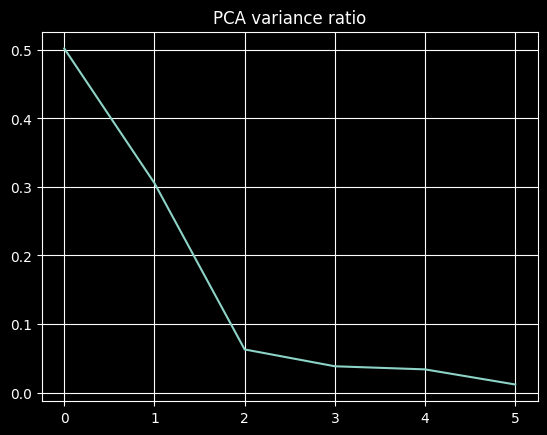

In [21]:
plt.style.use("dark_background")
plt.plot(pca.explained_variance_ratio_)
plt.title('PCA variance ratio')
plt.grid()
plt.show()

In [22]:
pca_df.head()

0         1         2         3         4         5  longitude  \
0 -12.688948 -0.331300 -4.058187  1.887009 -0.570801 -0.093466 -95.125000   
1 -12.756904 -0.301539 -4.052919  1.957064 -0.606899 -0.129293 -95.083333   
2 -12.833668 -0.268478 -4.044018  2.032412 -0.642237 -0.165910 -95.041667   
3 -12.841361 -0.199602 -4.026118  2.116316 -0.668876 -0.214254 -95.000000   
4 -12.877683 -0.138384 -4.010725  2.187151 -0.679090 -0.253729 -94.958333   

    latitude              Level_1                 Level_2  \
0  49.333333  5  NORTHERN FORESTS  5.2  MIXED WOOD SHIELD   
1  49.333333  5  NORTHERN FORESTS  5.2  MIXED WOOD SHIELD   
2  49.333333  5  NORTHERN FORESTS  5.2  MIXED WOOD SHIELD   
3  49.333333  5  NORTHERN FORESTS  5.2  MIXED WOOD SHIELD   
4  49.333333  5  NORTHERN FORESTS  5.2  MIXED WOOD SHIELD   

                              Level_3         Level_4  \
0  5.2.2  Northern Minnesota Wetlands  49a  Peatlands   
1  5.2.2  Northern Minnesota Wetlands  49a  Peatlands   
2  5.2.2  Northern Minnesota Wetlands  49a  Peatlands   
3  5.2.2  Northern Minnesota Wetlands  49a  Peatlands   
4  5.2.2  Northern Minnesota Wetlands  49a  Peatlands   

                      ECO_NAME climates_f  
0  Western Great Lakes forests        Dfb  
1  Western Great Lakes forests        Dfb  
2  Western Great Lakes forests        Dfb  
3  Western Great Lakes forests        Dfb  
4  Western Great Lakes forests        Dfb

In [23]:
pca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470320 entries, 0 to 470319
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   0           470320 non-null  float64 
 1   1           470320 non-null  float64 
 2   2           470320 non-null  float64 
 3   3           470320 non-null  float64 
 4   4           470320 non-null  float64 
 5   5           470320 non-null  float64 
 6   longitude   470320 non-null  float64 
 7   latitude    470320 non-null  float64 
 8   Level_1     470320 non-null  category
 9   Level_2     470320 non-null  category
 10  Level_3     470320 non-null  category
 11  Level_4     470320 non-null  category
 12  ECO_NAME    470320 non-null  category
 13  climates_f  470320 non-null  category
dtypes: category(6), float64(8)
memory usage: 31.9 MB


In [24]:
pca_df.columns

Index([           0,            1,            2,            3,            4,
                  5,  'longitude',   'latitude',    'Level_1',    'Level_2',
          'Level_3',    'Level_4',   'ECO_NAME', 'climates_f'],
      dtype='object')

In [25]:
pairs = list(itertools.combinations([0,1,2], 2))
print(pairs)

[(0, 1), (0, 2), (1, 2)]


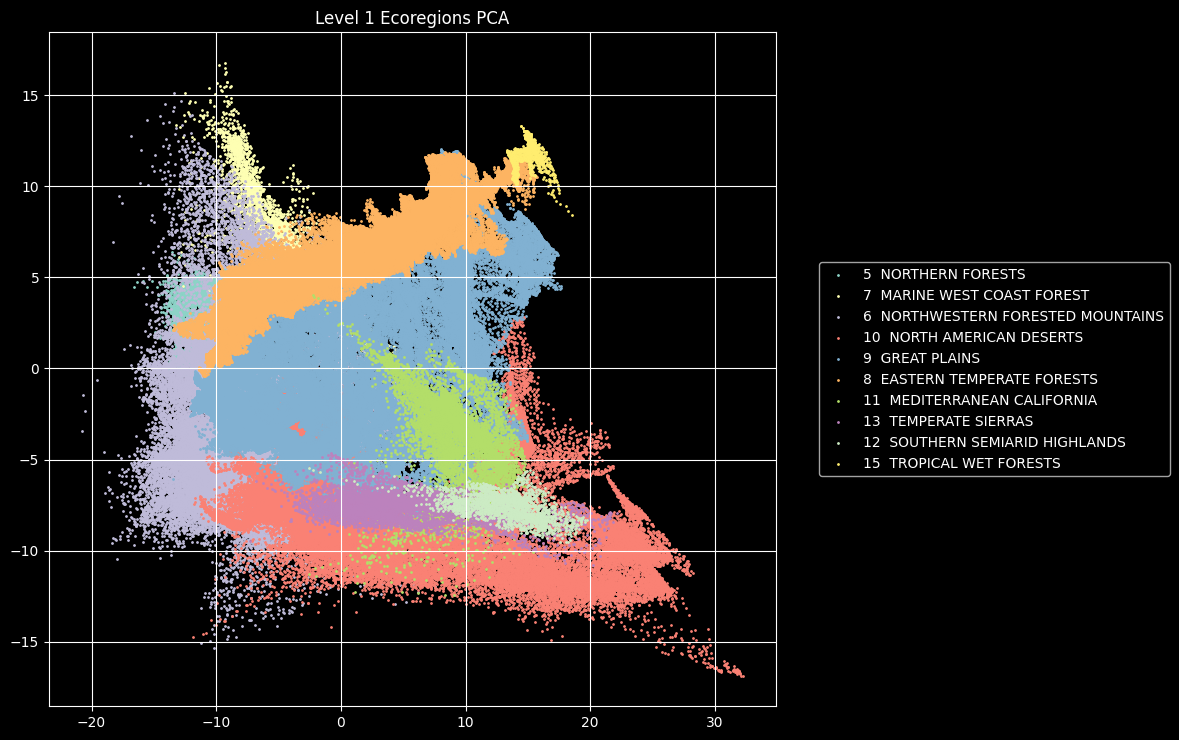

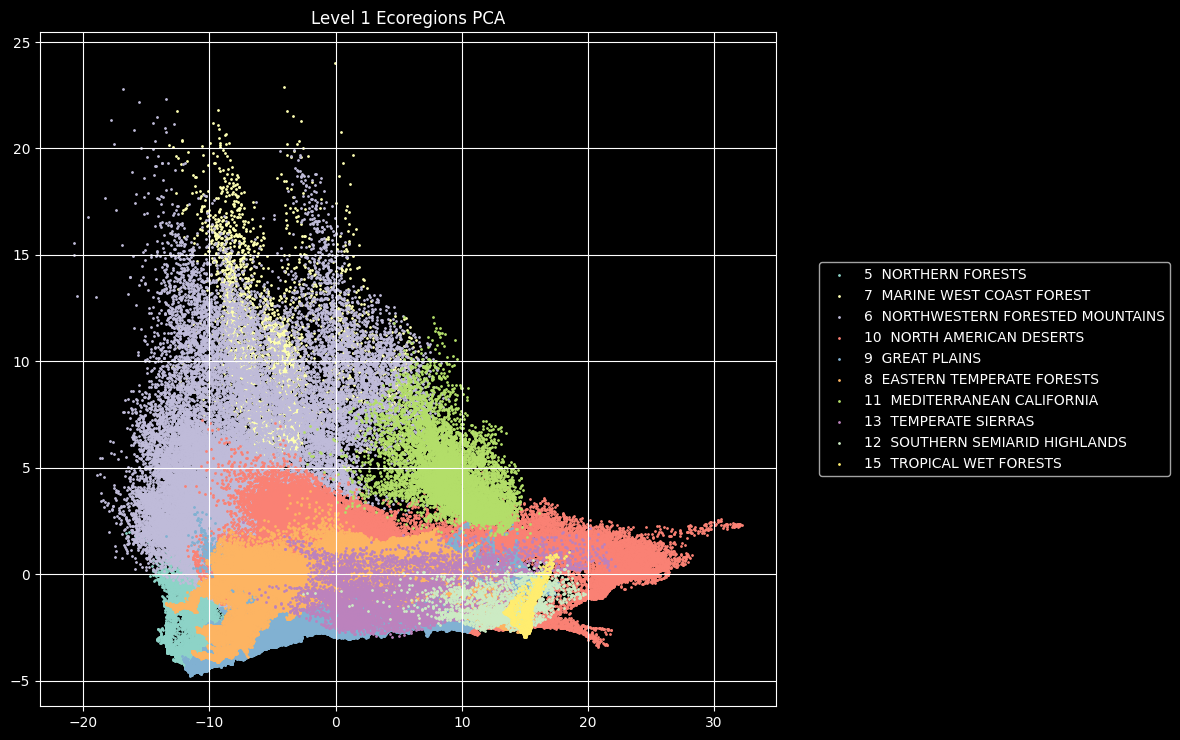

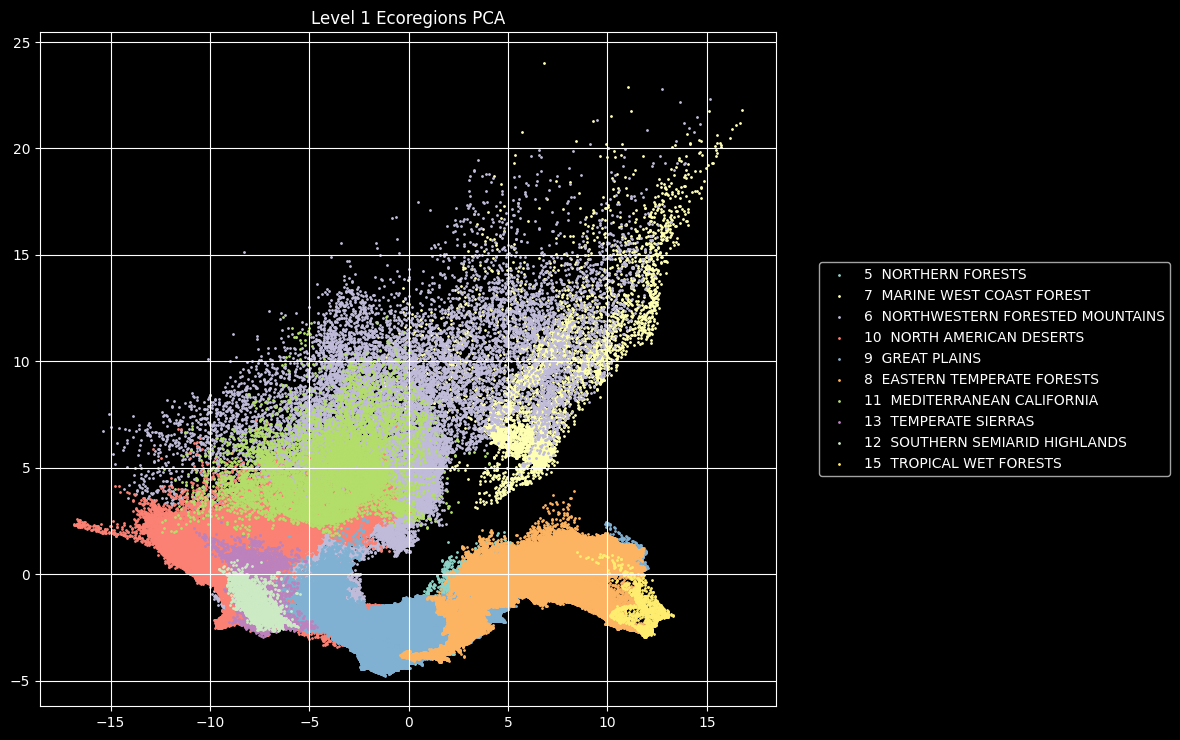

In [26]:
for i, j in pairs:
    plt.style.use("dark_background")
    plt.figure(figsize=(12,7.5))
    for k in pca_df.Level_1.unique():
        plt.scatter(pca_df[pca_df.Level_1 == k][i], pca_df[pca_df.Level_1 == k][j], s=1, label = k)
    plt.legend(
        bbox_to_anchor=(1.05, 0.5), 
        loc='center left')
    plt.grid()
    plt.title('Level 1 Ecoregions PCA')
    plt.tight_layout()
    plt.show()

# KMeans

## Scaled data

In [27]:
df_labels = pd.DataFrame(scaled_df[['latitude', 'longitude', 'Level_1', 'Level_2', 'Level_3', 'Level_4', 'ECO_NAME', 'climates_f']])
X_scaled = pd.DataFrame(scaled_df.drop(columns = ['latitude', 'longitude', 'Level_1', 'Level_2', 'Level_3', 'Level_4', 'ECO_NAME', 'climates_f']))

In [28]:
df_labels.Level_1.value_counts()

Level_1
8  EASTERN TEMPERATE FORESTS          147066
9  GREAT PLAINS                       137052
10  NORTH AMERICAN DESERTS             84567
6  NORTHWESTERN FORESTED MOUNTAINS     52764
5  NORTHERN FORESTS                    24177
11  MEDITERRANEAN CALIFORNIA            9499
13  TEMPERATE SIERRAS                   6136
7  MARINE WEST COAST FOREST             5596
12  SOUTHERN SEMIARID HIGHLANDS         2362
15  TROPICAL WET FORESTS                1101
Name: count, dtype: int64

In [29]:
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)
df_labels['scaled_kmeans_label'] = clusters
for i in df_labels.Level_1.unique(): 
    print(i)
    print(df_labels[df_labels.Level_1 == i].scaled_kmeans_label.value_counts(normalize=True))
    print()

5  NORTHERN FORESTS
scaled_kmeans_label
6    0.895851
3    0.104149
Name: proportion, dtype: float64

7  MARINE WEST COAST FOREST
scaled_kmeans_label
9    0.932273
5    0.024839
3    0.024124
7    0.018763
Name: proportion, dtype: float64

6  NORTHWESTERN FORESTED MOUNTAINS
scaled_kmeans_label
0    0.441305
8    0.267626
9    0.142218
2    0.070559
6    0.065632
5    0.011182
7    0.001023
3    0.000417
4    0.000038
Name: proportion, dtype: float64

10  NORTH AMERICAN DESERTS
scaled_kmeans_label
2    0.376317
8    0.273558
4    0.156952
5    0.133527
0    0.059207
1    0.000414
9    0.000024
Name: proportion, dtype: float64

9  GREAT PLAINS
scaled_kmeans_label
8    0.296982
6    0.151468
5    0.128761
3    0.118094
1    0.112227
7    0.103362
2    0.082407
0    0.006698
Name: proportion, dtype: float64

8  EASTERN TEMPERATE FORESTS
scaled_kmeans_label
7    0.349768
3    0.292603
1    0.260040
6    0.097589
Name: proportion, dtype: float64

11  MEDITERRANEAN CALIFORNIA
scaled_kmeans_la

In [30]:
pca_df['scaled_kmeans_label'] = clusters

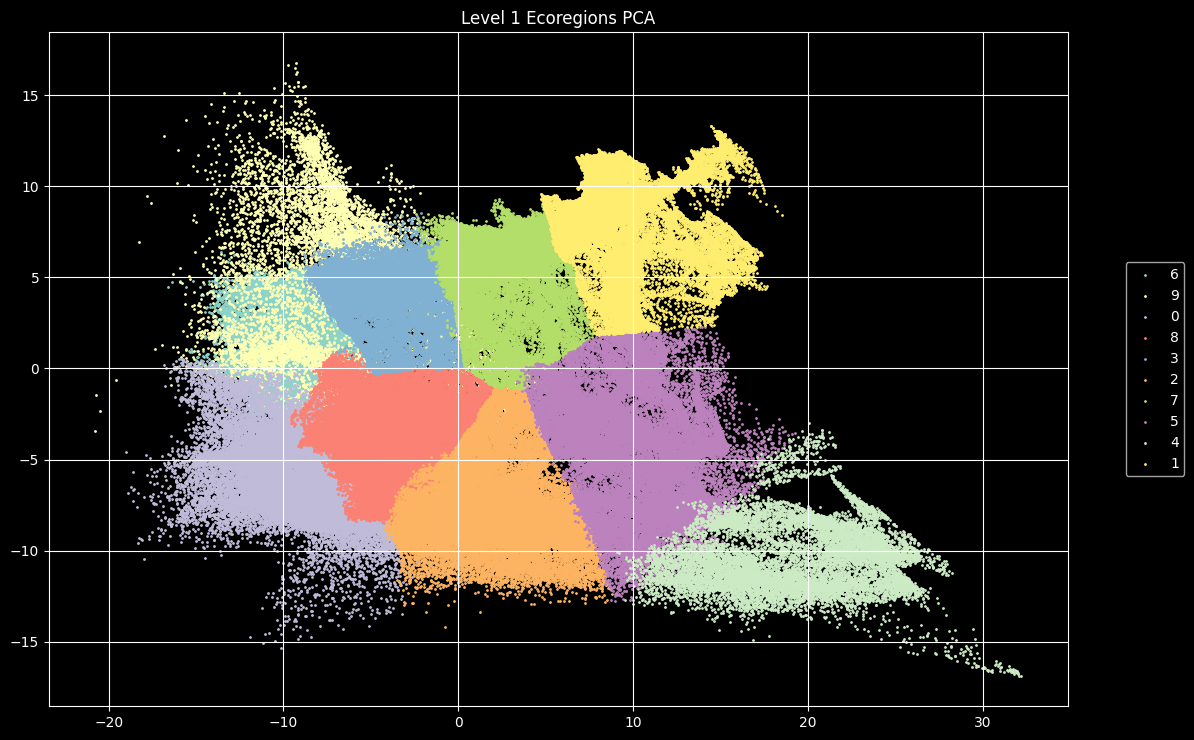

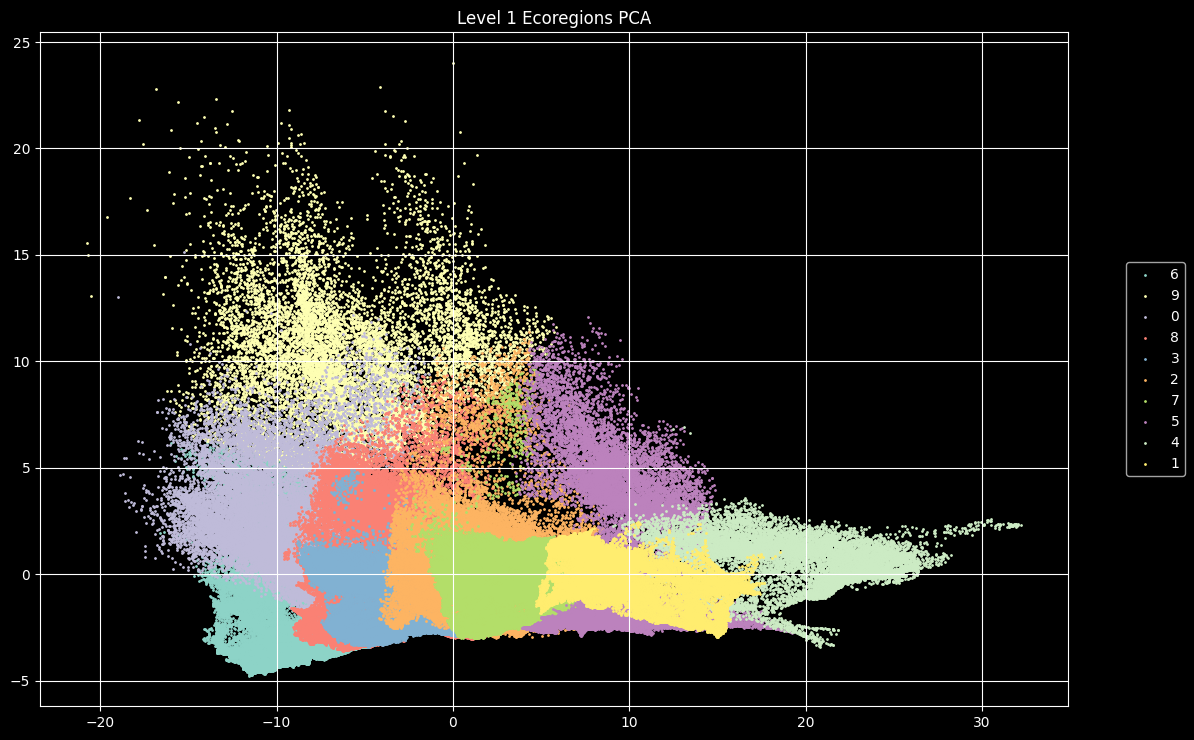

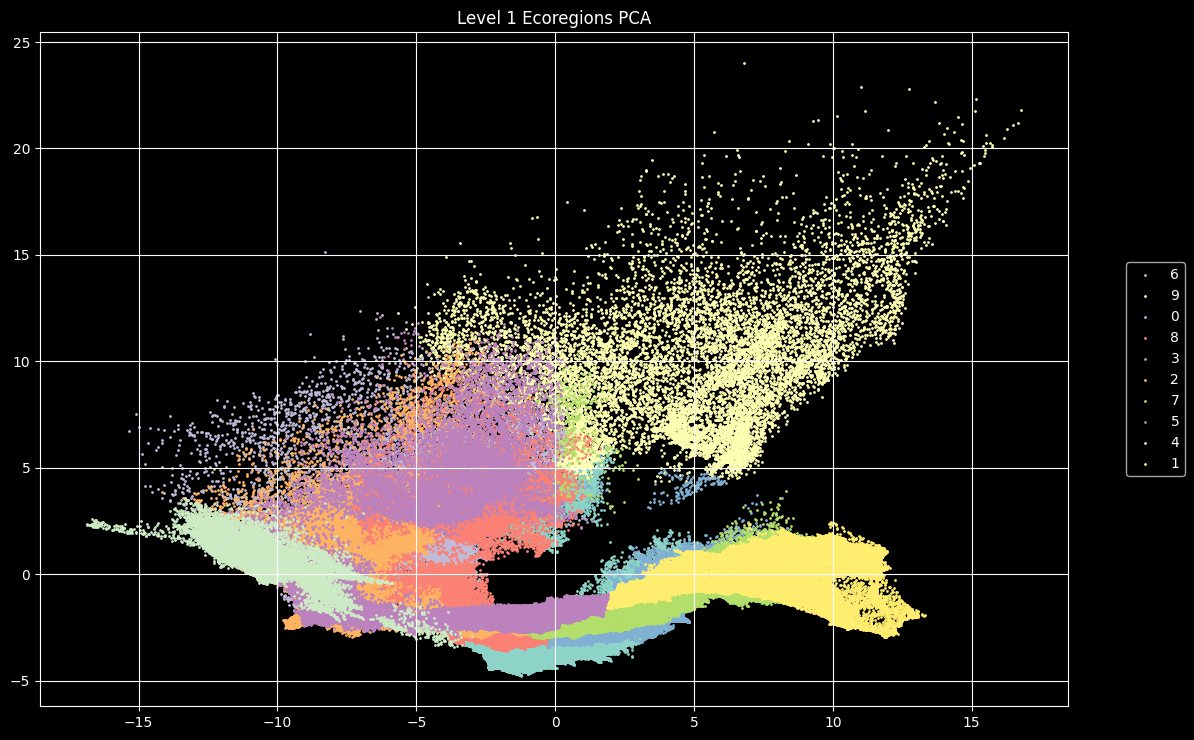

In [31]:
for i, j in pairs:
    plt.style.use("dark_background")
    plt.figure(figsize=(12,7.5))
    for k in pca_df.scaled_kmeans_label.unique():
        plt.scatter(pca_df[pca_df.scaled_kmeans_label == k][i], pca_df[pca_df.scaled_kmeans_label == k][j], s=1, label = k)
    plt.legend(
        bbox_to_anchor=(1.05, 0.5), 
        loc='center left')
    plt.grid()
    plt.title('Level 1 Ecoregions PCA')
    plt.tight_layout()
    plt.show()

## PCA data

In [32]:
X_pca = pd.DataFrame(pca_df[[0, 1, 2]])
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_pca)
df_labels['pca_kmeans_label'] = clusters

In [33]:
pca_df['pca_kmeans_label'] = clusters

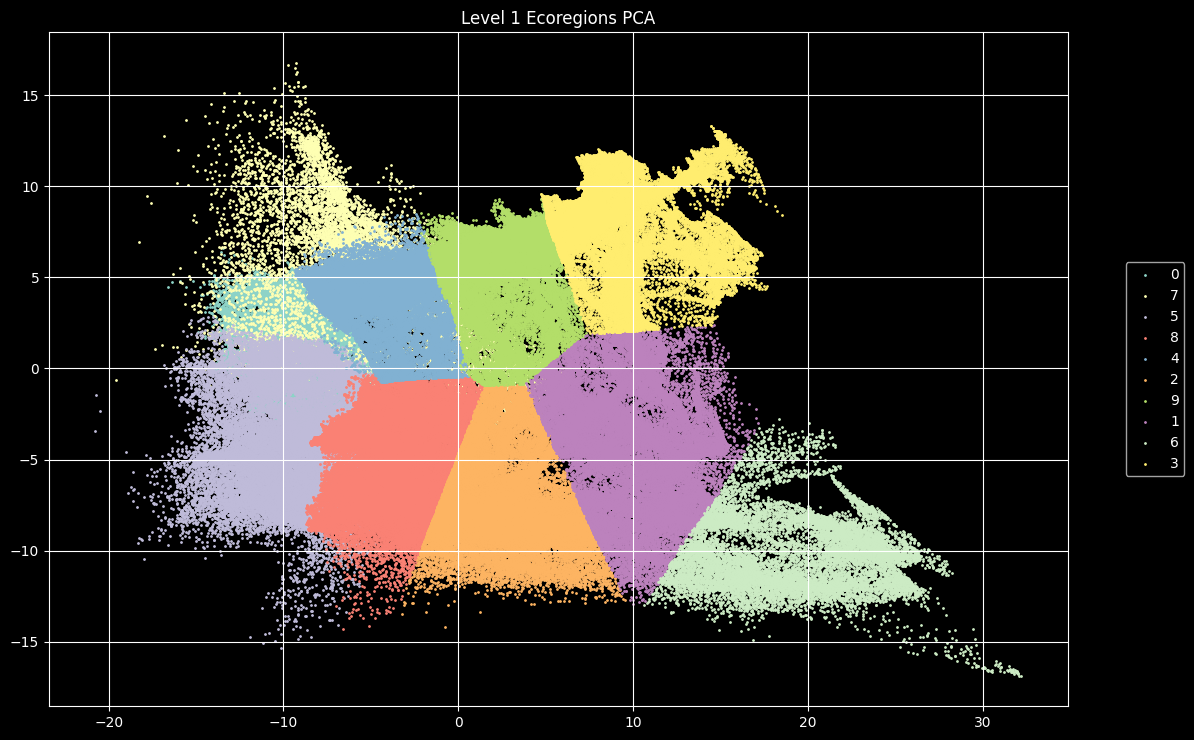

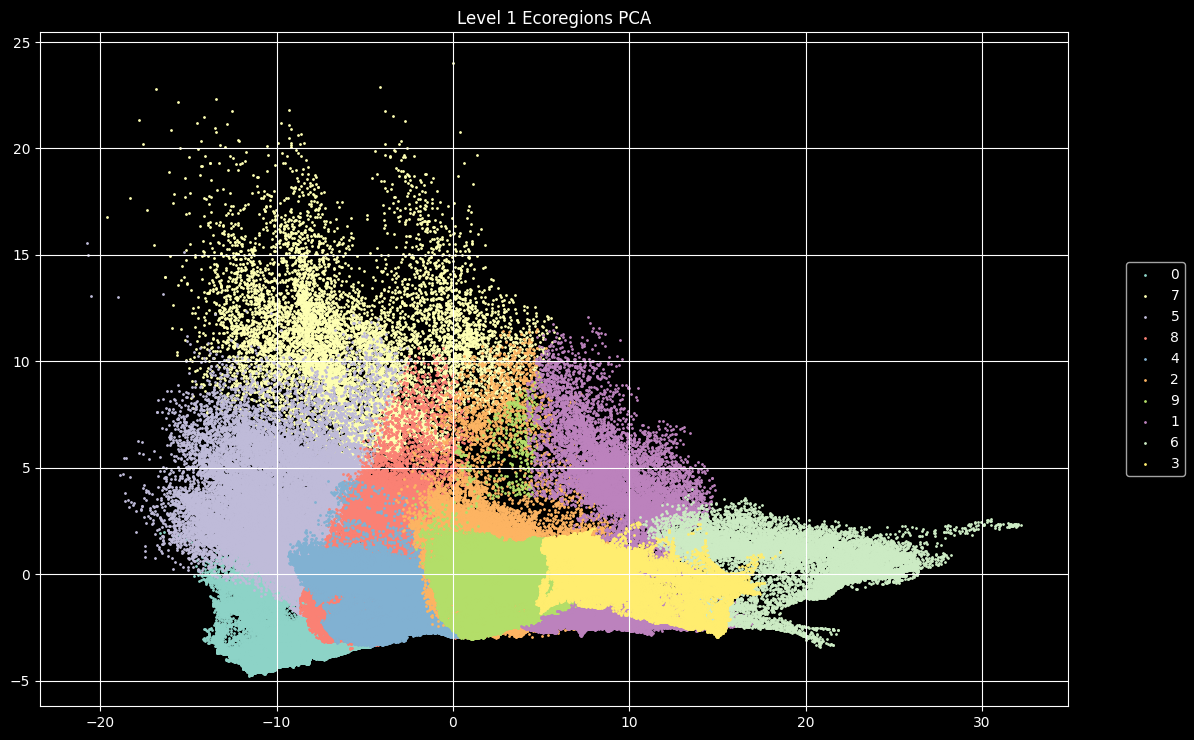

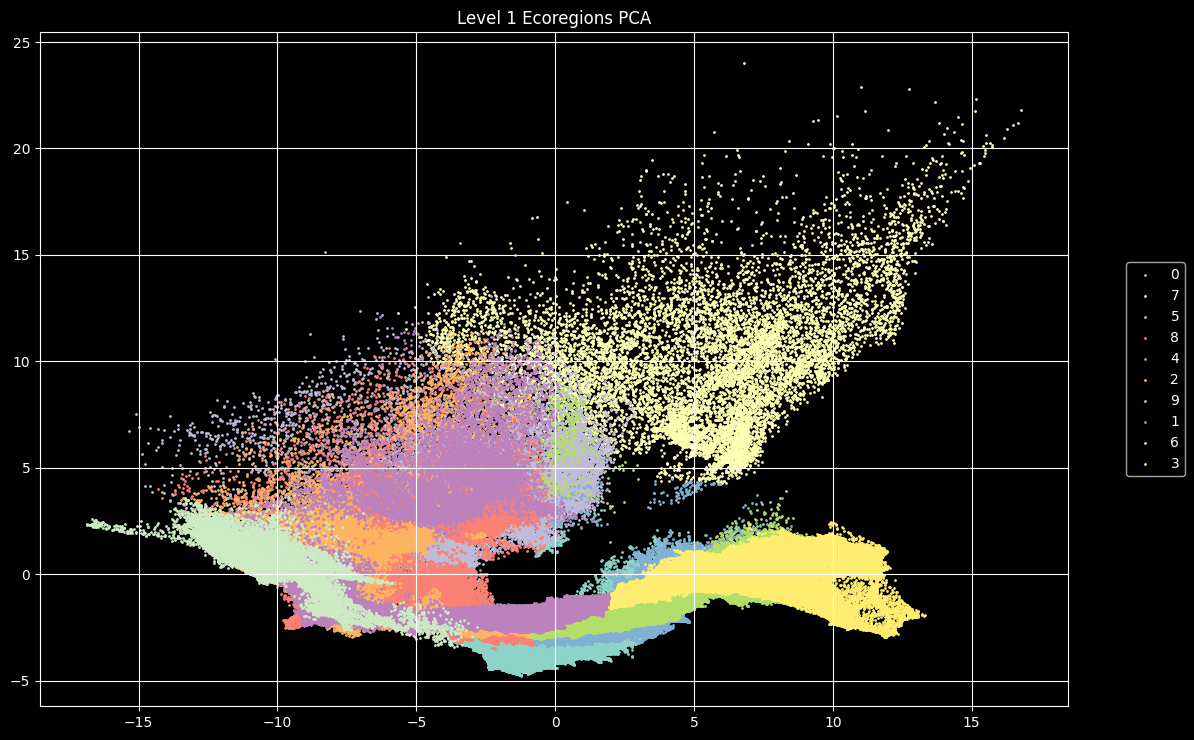

In [34]:
for i, j in pairs:
    plt.style.use("dark_background")
    plt.figure(figsize=(12,7.5))
    for k in pca_df.pca_kmeans_label.unique():
        plt.scatter(pca_df[pca_df.pca_kmeans_label == k][i], pca_df[pca_df.pca_kmeans_label == k][j], s=1, label = k)
    plt.legend(
        bbox_to_anchor=(1.05, 0.5), 
        loc='center left')
    plt.grid()
    plt.title('Level 1 Ecoregions PCA')
    plt.tight_layout()
    plt.show()

# MDS

In [35]:
mds_landmarks = pd.DataFrame()
for i in pca_df.Level_1.unique():
    sample_df = pca_df[pca_df.Level_1 == i].sample(120, random_state=42)
    mds_landmarks = pd.concat([mds_landmarks, sample_df])

In [36]:
X_landmarks = mds_landmarks[[0, 1, 2, 3, 4, 5]]
X_full = pca_df[[0, 1, 2, 3, 4, 5]]

D_landmarks = squareform(pdist(X_landmarks.values, metric='braycurtis'))

In [37]:
# MDS on landmarks
mds = MDS(n_components=2, dissimilarity="precomputed", metric=True, random_state=42, n_jobs=-1)
Y_landmarks = mds.fit_transform(D_landmarks)

# Compute dissimilarities between all points and landmarks
D_full_landmarks = cdist(X_full.values, X_landmarks.values, metric='braycurtis')

# Simple triangulation: approximate embedding by weighted average of nearest landmarks
nearest_idx = np.argmin(D_full_landmarks, axis=1)
Y_full = Y_landmarks[nearest_idx]

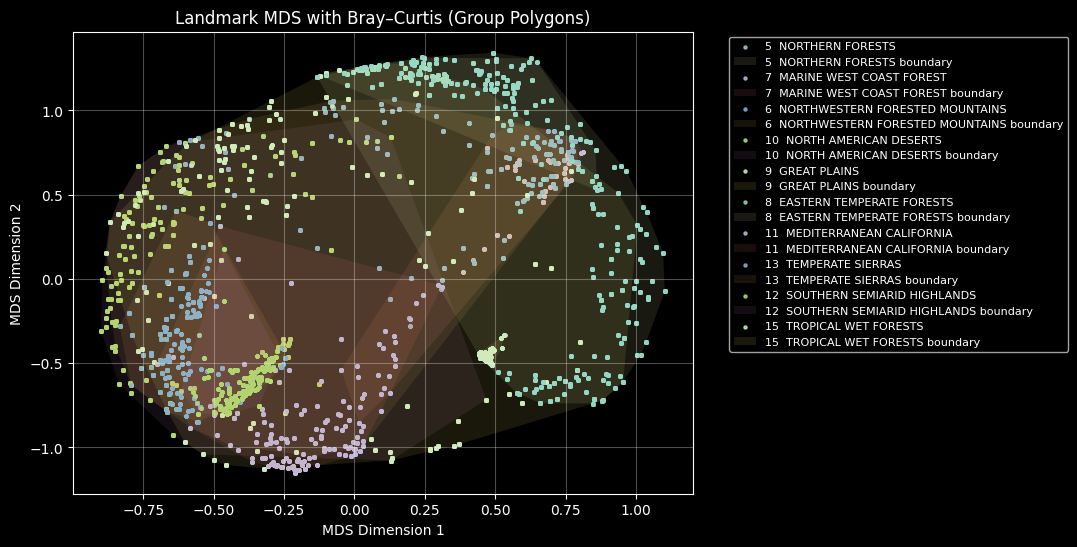

In [38]:
plt.style.use("dark_background")
plt.figure(figsize=(8,6))
for cat in pca_df.Level_1.unique():
    mask = pca_df.Level_1 == cat
    points = Y_full[mask]
    plt.scatter(points[:, 0], points[:, 1], s=5, alpha=0.8, label=cat)

    # Convex hull polygon
    if len(points) >= 3:  # need at least 3 points
        hull = ConvexHull(points)
        hull_points = points[hull.vertices]

        plt.fill(
            hull_points[:, 0],
            hull_points[:, 1],
            alpha=0.1, 
            label=f"{cat} boundary"
        )

plt.xlabel("MDS Dimension 1")
plt.ylabel("MDS Dimension 2")
plt.title("Landmark MDS with Bray–Curtis (Group Polygons)")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=8)
plt.grid(True, alpha=0.3)
plt.show()

In [39]:
# Train regression models to predict MDS coords from dissimilarities
reg_x = Ridge(alpha=1.0)
reg_y = Ridge(alpha=1.0)

# Fit only on landmarks themselves
reg_x.fit(D_landmarks, Y_landmarks[:, 0])
reg_y.fit(D_landmarks, Y_landmarks[:, 1])

# Predict full dataset embedding
Y_full = np.vstack([
    reg_x.predict(D_full_landmarks),
    reg_y.predict(D_full_landmarks)
]).T

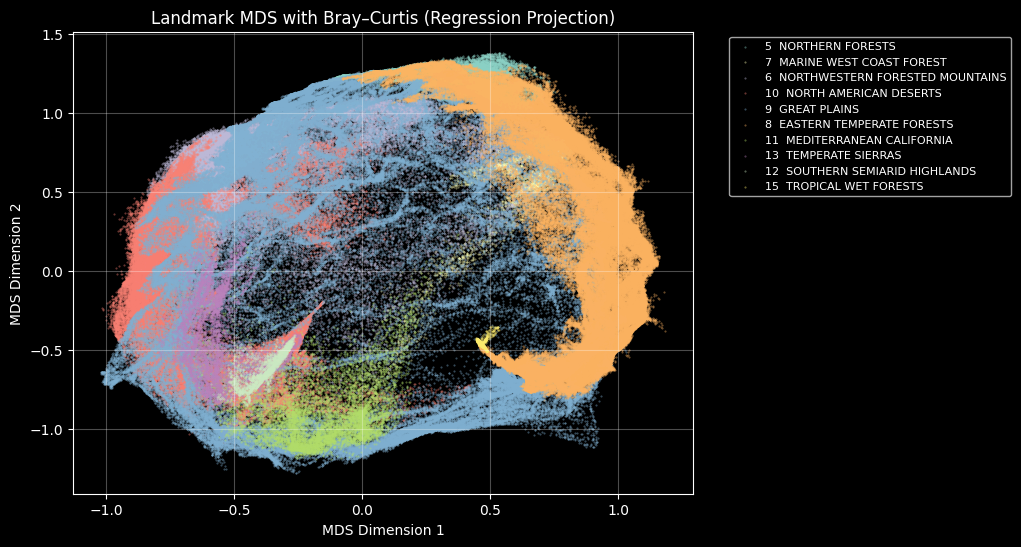

In [40]:
plt.figure(figsize=(8,6))
for cat in pca_df.Level_1.unique():
    mask = pca_df.Level_1 == cat
    plt.scatter(Y_full[mask, 0], Y_full[mask, 1], s=0.2, label=cat, alpha=0.5)

plt.xlabel("MDS Dimension 1")
plt.ylabel("MDS Dimension 2")
plt.title("Landmark MDS with Bray–Curtis (Regression Projection)")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=8)
plt.grid(True, alpha=0.3)
plt.show()

# UMAP

## Level 1

In [41]:
umap_landmarks = pd.DataFrame()
for i in pca_df.Level_1.unique():
    sample_df = pca_df[pca_df.Level_1 == i].sample(500, random_state=42)
    umap_landmarks = pd.concat([umap_landmarks, sample_df])

y = umap_landmarks.Level_1
X_landmarks = umap_landmarks[[0, 1, 2, 3, 4, 5]]

In [42]:
umap_model = umap.UMAP(
    n_neighbors=500,      
    min_dist=0.1,        
    n_components=2,      
    metric='euclidean')  # or 'manhattan' / 'cosine' / 'braycurtis' / 'euclidean' / 'correlation'

embedding = umap_model.fit_transform(X_landmarks)

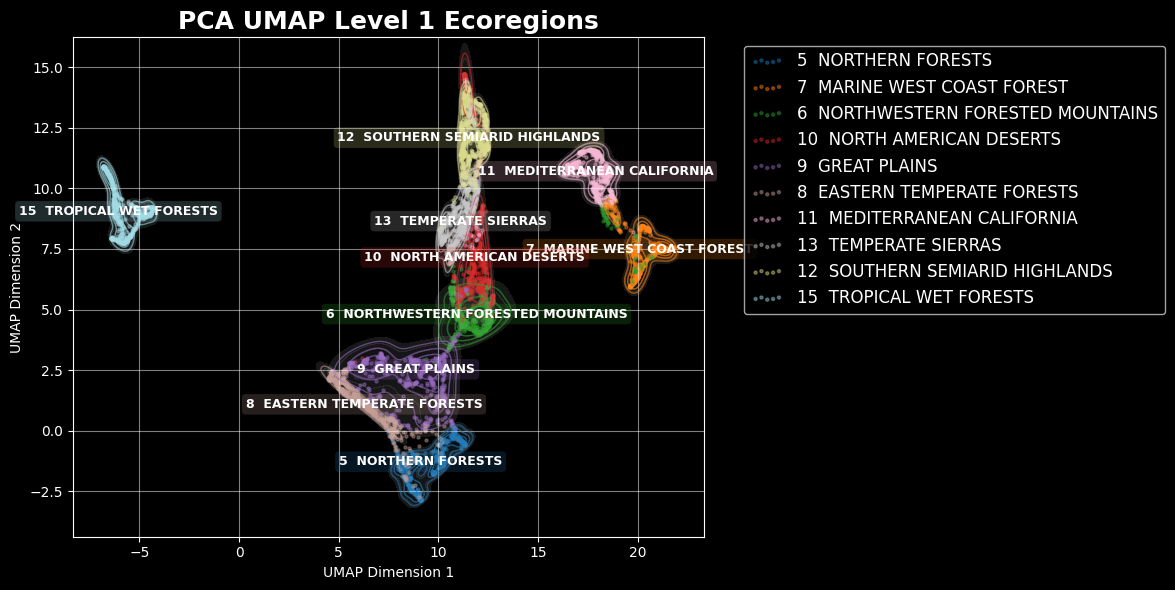

In [43]:
plt.style.use("dark_background")
plt.figure(figsize=(12, 6))

categories = y.unique()
colors = plt.cm.tab20(np.linspace(0, 1, len(categories)))

for cat, color in zip(categories, colors):
    mask = y == cat
    points = embedding[mask].T 
    plt.scatter(points[0], points[1], s=5, alpha=0.4, color=color, label=cat)
    if points.shape[1] > 50:
        kde = gaussian_kde(points, bw_method='scott')  # silverman / scott
        
        # Grid limits (slightly beyond point range)
        x_min, x_max = points[0].min() - 1.5, points[0].max() + 1.5
        y_min, y_max = points[1].min() - 1.5, points[1].max() + 1.5
        xx, yy = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        zz = kde(np.vstack([xx.ravel(), yy.ravel()])).reshape(xx.shape)
        zz = zz / zz.max()  # normalize 0–1 for each category
        
        # Custom color map fading to white
        cmap = LinearSegmentedColormap.from_list("", ["white", color])
        plt.contourf(xx, yy, zz, levels=np.linspace(0.2, 1, 6), cmap=cmap, alpha=0.1)
        plt.contour(xx, yy, zz, levels=[0.3, 0.5, 0.7, 0.9], colors=[color], linewidths=1, alpha=0.6)

    x_mean = np.median(points[0])  # median often more robust than mean
    y_mean = np.median(points[1])
    plt.text(
        x_mean, y_mean, cat,
        fontsize=9, weight="bold", color="white",
        ha="center", va="center",
        bbox=dict(facecolor=color, alpha=0.2, edgecolor="none", boxstyle="round,pad=0.3")
    )

plt.title("PCA UMAP Level 1 Ecoregions", fontsize=18, weight="bold")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=12, scatterpoints=5)
plt.grid(alpha=0.5)
plt.tight_layout()
#plt.savefig(r"docs\umap_ecoregions.png")
plt.show()

## Koppen-Geiger

In [44]:
umap_landmarks = pd.DataFrame()
for i in pca_df.Level_1.unique():
    sample_df = pca_df[pca_df.Level_1 == i].sample(500, random_state=42)
    umap_landmarks = pd.concat([umap_landmarks, sample_df])

y = umap_landmarks.climates_f
X_landmarks = umap_landmarks[[0, 1, 2, 3, 4, 5]]

In [45]:
umap_model = umap.UMAP(
    n_neighbors=500,      
    min_dist=0.1,        
    n_components=2,      
    metric='euclidean')  # or 'manhattan' / 'cosine' / 'braycurtis' / 'euclidean' / 'correlation'

embedding = umap_model.fit_transform(X_landmarks)

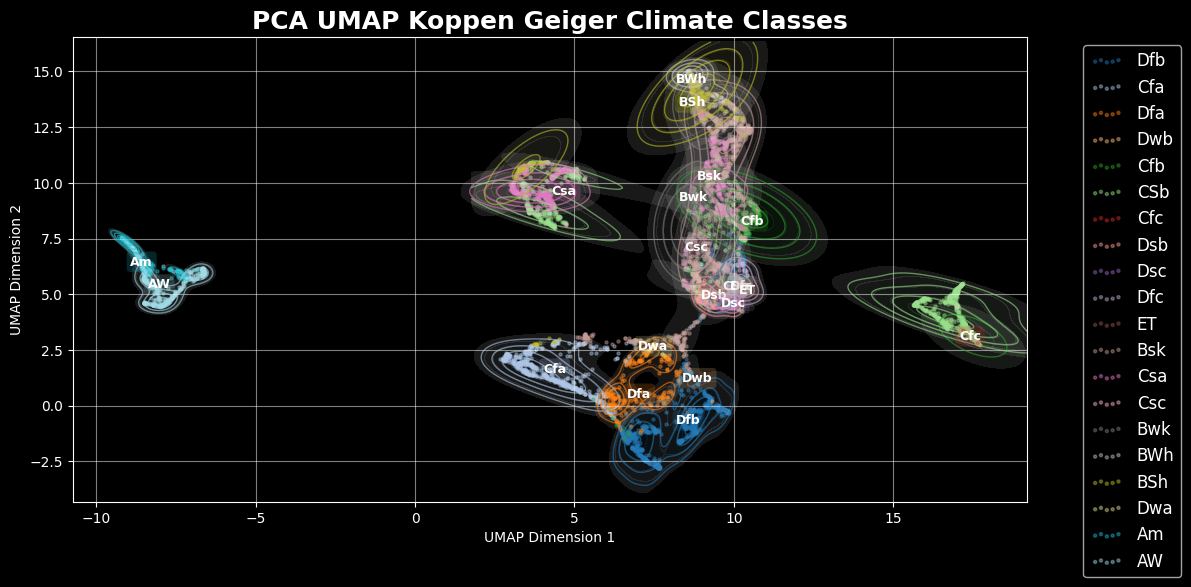

In [46]:
plt.style.use("dark_background")
plt.figure(figsize=(12, 6))

categories = y.unique()
colors = plt.cm.tab20(np.linspace(0, 1, len(categories)))

for cat, color in zip(categories, colors):
    mask = y == cat
    points = embedding[mask].T 
    plt.scatter(points[0], points[1], s=5, alpha=0.4, color=color, label=cat)
    if points.shape[1] > 50:
        kde = gaussian_kde(points, bw_method='scott')  # silverman / scott
        
        # Grid limits (slightly beyond point range)
        x_min, x_max = points[0].min() - 1.5, points[0].max() + 1.5
        y_min, y_max = points[1].min() - 1.5, points[1].max() + 1.5
        xx, yy = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        zz = kde(np.vstack([xx.ravel(), yy.ravel()])).reshape(xx.shape)
        zz = zz / zz.max()  # normalize 0–1 for each category
        
        # Custom color map fading to white
        cmap = LinearSegmentedColormap.from_list("", ["white", color])
        plt.contourf(xx, yy, zz, levels=np.linspace(0.2, 1, 6), cmap=cmap, alpha=0.1)
        plt.contour(xx, yy, zz, levels=[0.3, 0.5, 0.7, 0.9], colors=[color], linewidths=1, alpha=0.6)

    x_mean = np.median(points[0])  # median often more robust than mean
    y_mean = np.median(points[1])
    plt.text(
        x_mean, y_mean, cat,
        fontsize=9, weight="bold", color="white",
        ha="center", va="center",
        bbox=dict(facecolor=color, alpha=0.2, edgecolor="none", boxstyle="round,pad=0.3")
    )

plt.title("PCA UMAP Koppen Geiger Climate Classes", fontsize=18, weight="bold")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=12, scatterpoints=5)
plt.grid(alpha=0.5)
plt.tight_layout()
#plt.savefig(r"docs\umap_kgclasses_ecoregions.png")
plt.show()

In [47]:
kg_list = list(pca_df.climates_f.value_counts()[:13].index)

In [48]:
umap_landmarks = pd.DataFrame()
for i in kg_list:
    sample_df = pca_df[pca_df.climates_f == i].sample(100, random_state=42)
    umap_landmarks = pd.concat([umap_landmarks, sample_df])

y = umap_landmarks.climates_f
X_landmarks = umap_landmarks[[0, 1, 2, 3, 4, 5]]

In [49]:
umap_model = umap.UMAP(
    n_neighbors=20,      
    min_dist=0.1,        
    n_components=2,      
    metric='cosine')  # or 'manhattan' / 'cosine' / 'braycurtis' / 'euclidean' / 'correlation'

embedding = umap_model.fit_transform(X_landmarks)

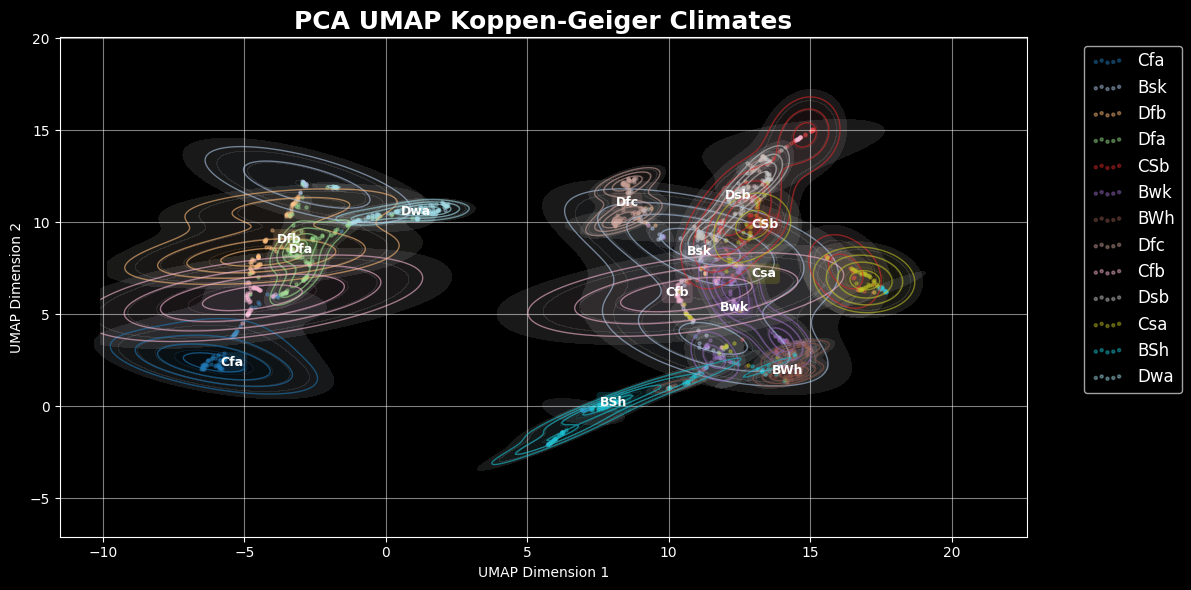

In [50]:
plt.style.use("dark_background")
plt.figure(figsize=(12, 6))

categories = y.unique()
colors = plt.cm.tab20(np.linspace(0, 1, len(categories)))

for cat, color in zip(categories, colors):
    mask = y == cat
    points = embedding[mask].T 
    plt.scatter(points[0], points[1], s=5, alpha=0.4, color=color, label=cat)
    if points.shape[1] > 50:
        kde = gaussian_kde(points, bw_method='scott')  # silverman / scott
        
        # Grid limits (slightly beyond point range)
        x_min, x_max = points[0].min() - 5, points[0].max() + 5
        y_min, y_max = points[1].min() - 5, points[1].max() + 5
        xx, yy = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        zz = kde(np.vstack([xx.ravel(), yy.ravel()])).reshape(xx.shape)
        zz = zz / zz.max()  # normalize 0–1 for each category
        
        # Custom color map fading to white
        cmap = LinearSegmentedColormap.from_list("", ["white", color])
        plt.contourf(xx, yy, zz, levels=np.linspace(0.2, 1, 6), cmap=cmap, alpha=0.1)
        plt.contour(xx, yy, zz, levels=[0.3, 0.5, 0.7, 0.9], colors=[color], linewidths=1, alpha=0.6)

    x_mean = np.median(points[0])  # median often more robust than mean
    y_mean = np.median(points[1])
    plt.text(
        x_mean, y_mean, cat,
        fontsize=9, weight="bold", color="white",
        ha="center", va="center",
        bbox=dict(facecolor=color, alpha=0.2, edgecolor="none", boxstyle="round,pad=0.3")
    )

plt.title("PCA UMAP Koppen-Geiger Climates", fontsize=18, weight="bold")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=12, scatterpoints=5)
plt.grid(alpha=0.5)
plt.tight_layout()
#plt.savefig(r"docs\umap_KG_ecoregions.png")
plt.show()

## WWF ecoregions

In [51]:
wwf_ecoregions = list(pca_df.ECO_NAME.value_counts()[:10].index)

umap_landmarks = pd.DataFrame()
for i in wwf_ecoregions:
    sample_df = pca_df[pca_df.ECO_NAME == i].sample(250, random_state=42)
    umap_landmarks = pd.concat([umap_landmarks, sample_df])

y = umap_landmarks.ECO_NAME
X_landmarks = umap_landmarks[[0, 1, 2, 3, 4, 5]]

In [52]:
umap_model = umap.UMAP(
    n_neighbors=250,      
    min_dist=0.1,        
    n_components=2,      
    metric='euclidean')  # or 'manhattan' / 'cosine' / 'braycurtis' / 'euclidean' / 'correlation'

embedding = umap_model.fit_transform(X_landmarks)

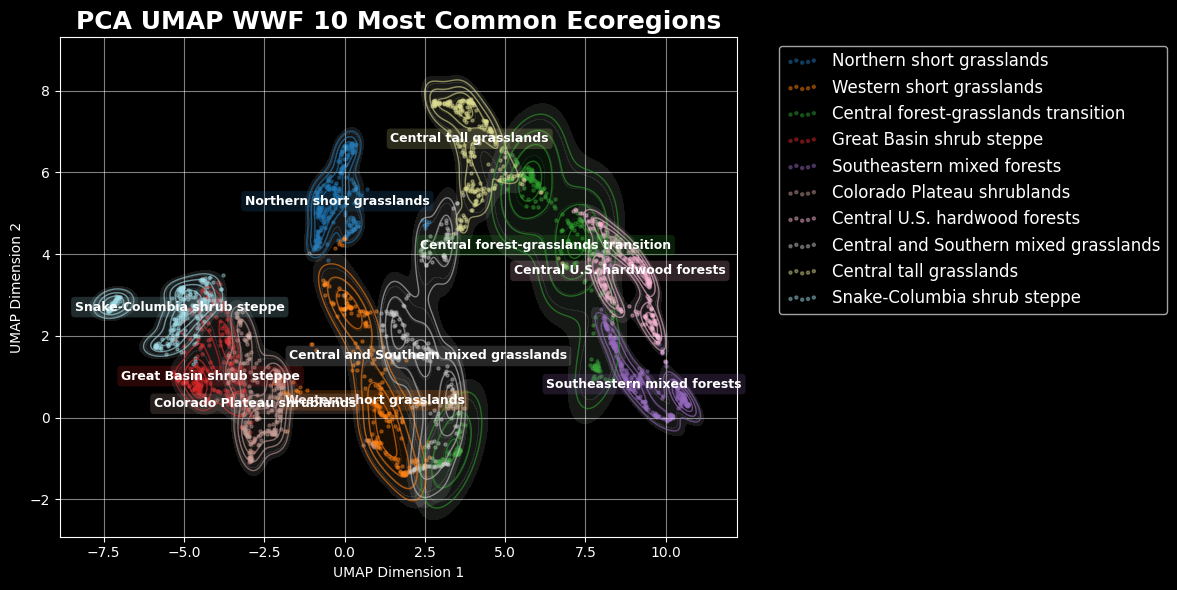

In [53]:
plt.style.use("dark_background")
plt.figure(figsize=(12, 6))

categories = y.unique()
colors = plt.cm.tab20(np.linspace(0, 1, len(categories)))

for cat, color in zip(categories, colors):
    mask = y == cat
    points = embedding[mask].T 
    plt.scatter(points[0], points[1], s=5, alpha=0.4, color=color, label=cat)
    if points.shape[1] > 50:
        kde = gaussian_kde(points, bw_method='scott')  # silverman / scott
        
        # Grid limits (slightly beyond point range)
        x_min, x_max = points[0].min() - 1.5, points[0].max() + 1.5
        y_min, y_max = points[1].min() - 1.5, points[1].max() + 1.5
        xx, yy = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        zz = kde(np.vstack([xx.ravel(), yy.ravel()])).reshape(xx.shape)
        zz = zz / zz.max()  # normalize 0–1 for each category
        
        # Custom color map fading to white
        cmap = LinearSegmentedColormap.from_list("", ["white", color])
        plt.contourf(xx, yy, zz, levels=np.linspace(0.2, 1, 6), cmap=cmap, alpha=0.1)
        plt.contour(xx, yy, zz, levels=[0.3, 0.5, 0.7, 0.9], colors=[color], linewidths=1, alpha=0.6)

    x_mean = np.median(points[0])  # median often more robust than mean
    y_mean = np.median(points[1])
    plt.text(
        x_mean, y_mean, cat,
        fontsize=9, weight="bold", color="white",
        ha="center", va="center",
        bbox=dict(facecolor=color, alpha=0.2, edgecolor="none", boxstyle="round,pad=0.3")
    )

plt.title("PCA UMAP WWF 10 Most Common Ecoregions", fontsize=18, weight="bold")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=12, scatterpoints=5)
plt.grid(alpha=0.5)
plt.tight_layout()
#plt.savefig(r"docs\umap_wwf_10common.png")
plt.show()

In [54]:
deserts = ['Chihuahuan desert', 'Mojave desert', 'Sonoran desert',  
           'Great Basin shrub steppe', 'Colorado Plateau shrublands', 
           'Arizona Mountains forests', 'Sierra Madre Oriental pine-oak forests']

In [55]:
umap_landmarks = pd.DataFrame()
for i in deserts:
    sample_df = pca_df[pca_df.ECO_NAME == i].sample(750, random_state=42, replace = True)
    umap_landmarks = pd.concat([umap_landmarks, sample_df])

y = umap_landmarks.ECO_NAME
X_landmarks = umap_landmarks[[0, 1, 2, 3, 4, 5]]

In [56]:
umap_model = umap.UMAP(
    n_neighbors=750,      
    min_dist=0.01,        
    n_components=2,      
    metric='euclidean')  # or 'manhattan' / 'cosine' / 'braycurtis' / 'euclidean' / 'correlation'

embedding = umap_model.fit_transform(X_landmarks)

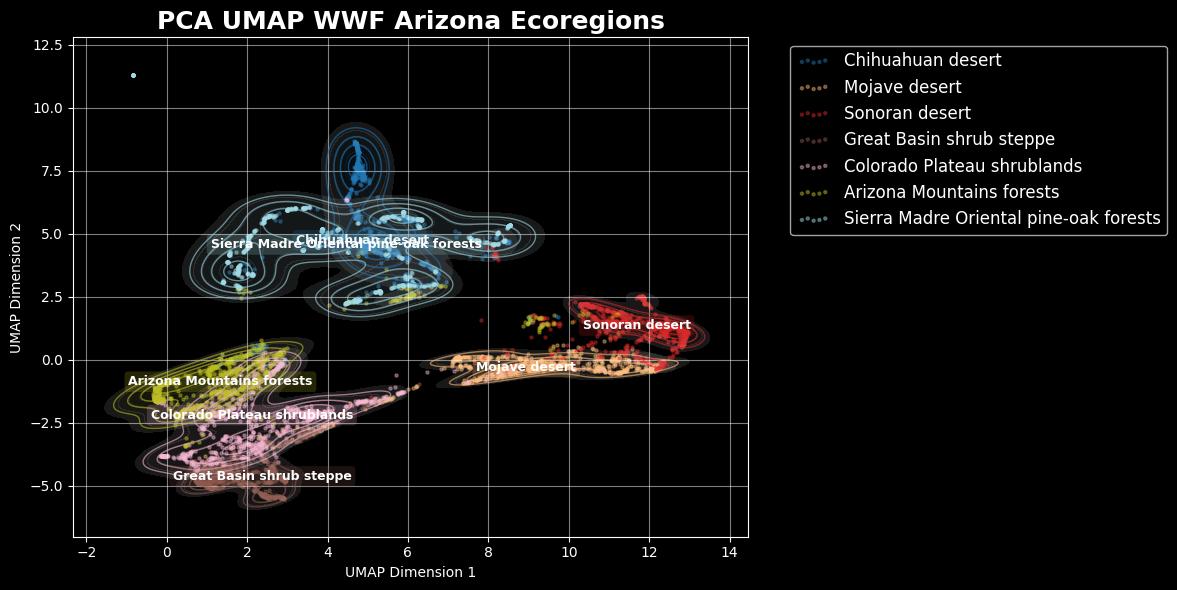

In [57]:
plt.style.use("dark_background")
plt.figure(figsize=(12, 6))

categories = y.unique()
colors = plt.cm.tab20(np.linspace(0, 1, len(categories)))

for cat, color in zip(categories, colors):
    mask = y == cat
    points = embedding[mask].T 
    plt.scatter(points[0], points[1], s=5, alpha=0.4, color=color, label=cat)
    if points.shape[1] > 50:
        kde = gaussian_kde(points, bw_method='scott')  # silverman / scott
        
        # Grid limits (slightly beyond point range)
        x_min, x_max = points[0].min() - 1.5, points[0].max() + 1.5
        y_min, y_max = points[1].min() - 1.5, points[1].max() + 1.5
        xx, yy = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        zz = kde(np.vstack([xx.ravel(), yy.ravel()])).reshape(xx.shape)
        zz = zz / zz.max()  # normalize 0–1 for each category
        
        # Custom color map fading to white
        cmap = LinearSegmentedColormap.from_list("", ["white", color])
        plt.contourf(xx, yy, zz, levels=np.linspace(0.2, 1, 6), cmap=cmap, alpha=0.1)
        plt.contour(xx, yy, zz, levels=[0.3, 0.5, 0.7, 0.9], colors=[color], linewidths=1, alpha=0.6)

    x_mean = np.median(points[0])  # median often more robust than mean
    y_mean = np.median(points[1])
    plt.text(
        x_mean, y_mean, cat,
        fontsize=9, weight="bold", color="white",
        ha="center", va="center",
        bbox=dict(facecolor=color, alpha=0.2, edgecolor="none", boxstyle="round,pad=0.3")
    )

plt.title("PCA UMAP WWF Arizona Ecoregions", fontsize=18, weight="bold")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=12, scatterpoints=5)
plt.grid(alpha=0.5)
plt.tight_layout()
#plt.savefig(r"docs\umap_ecoregions.png")
plt.show()